In [1]:
!pip install --upgrade --no-cache-dir pip
!pip install --upgrade --no-cache-dir matplotlib
!pip install --upgrade --no-cache-dir pandas
!pip install --upgrade --no-cache-dir numexpr
!pip install --upgrade --no-cache-dir scipy

Requirement already up-to-date: pip in /usr/local/lib/python2.7/site-packages
Requirement already up-to-date: matplotlib in /usr/local/lib/python2.7/site-packages
Requirement already up-to-date: numpy>=1.6 in /usr/local/lib/python2.7/site-packages (from matplotlib)
Requirement already up-to-date: pytz in /usr/local/lib/python2.7/site-packages (from matplotlib)
Requirement already up-to-date: pyparsing!=2.0.0,>=1.5.6 in /usr/local/lib/python2.7/site-packages (from matplotlib)
Requirement already up-to-date: python-dateutil in /usr/local/lib/python2.7/site-packages (from matplotlib)
Requirement already up-to-date: nose>=0.11.1 in /usr/local/lib/python2.7/site-packages (from matplotlib)
Requirement already up-to-date: six>=1.4 in /usr/local/lib/python2.7/site-packages (from matplotlib)
Requirement already up-to-date: mock in /usr/local/lib/python2.7/site-packages (from matplotlib)
Requirement already up-to-date: funcsigs in /usr/local/lib/python2.7/site-packages (from mock->matplotlib)
Re

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from math import sqrt

<a id="fig:weltkugel"></a>
**Abbildung: Schematische Darstellung der Weltkugel**

In [3]:
SPINE_COLOR = 'gray'

def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters

    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'text.fontsize': 8, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

# In-Flight

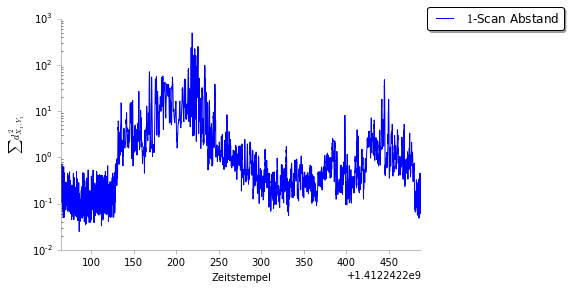

In [4]:
icp_fitness_score_1 = pd.read_csv("Data/In-Flight/icp_fitness_1.csv", delimiter=";", header=0)
plot = icp_fitness_score_1.plot(y='score',x='timestamp_1',logy=True)

plot.set_xlabel("Zeitstempel")
plot.set_ylabel("$\sum {d_{X_1, Y_1}^2}$")

plt.tight_layout()
format_axes(plot)

plot.legend(['$1$-Scan Abstand'], loc='center left', bbox_to_anchor=(1, 1), ncol=3, fancybox=True, shadow=True)
plt.savefig('Graphs/icp_fitness_1.pdf')

/usr/local/lib/python2.7/site-packages/matplotlib/legend.py:319: UserWarning: Unrecognized location "left". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(six.iterkeys(self.codes))))


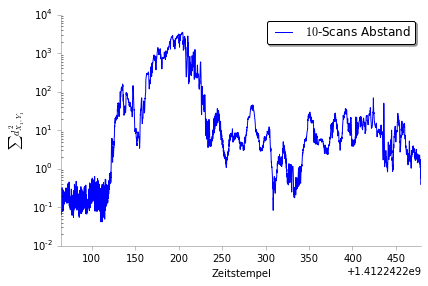

In [5]:
icp_fitness_score_10 = pd.read_csv("Data/In-Flight/icp_fitness_10.csv", delimiter=";", header=0)
plot = icp_fitness_score_10.plot(y='score',x='timestamp_1',logy=True)

plot.set_xlabel("Zeitstempel")
plot.set_ylabel("$\sum {d_{X_1, Y_1}^2}$")

plt.tight_layout()
format_axes(plot)

plot.legend(['$10$-Scans Abstand'], loc='left', bbox_to_anchor=(1, 1), ncol=3, fancybox=True, shadow=True)
plt.savefig('Graphs/icp_fitness_10.pdf')

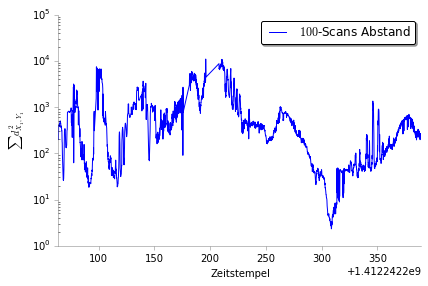

In [6]:
icp_fitness_score_100 = pd.read_csv("Data/In-Flight/icp_fitness_100.csv", delimiter=";", header=0)
plot = icp_fitness_score_100.plot(y='score',x='timestamp_1',logy=True)

plot.set_xlabel("Zeitstempel")
plot.set_ylabel("$\sum {d_{X_1, Y_1}^2}$")

plt.tight_layout()
format_axes(plot)

plot.legend(['$100$-Scans Abstand'], loc='left', bbox_to_anchor=(1, 1), ncol=3, fancybox=True, shadow=True)
plt.savefig('Graphs/icp_fitness_100.pdf')

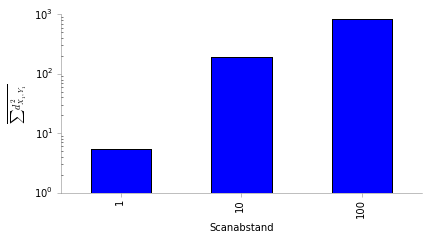

In [7]:
d = {'Scanabstand' : ['1','10','100'],
     'Score' : [icp_fitness_score_1['score'].mean(),icp_fitness_score_10['score'].mean(),icp_fitness_score_100['score'].mean()]}
df = pd.DataFrame(d)
df = df.set_index('Scanabstand')
plot = df.plot(kind='bar',logy=True)
plot.set_ylabel("$\overline{\sum {d_{X_1, Y_1}^2}}$")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .8])

plot.legend(['1-Bild','10-Bilder','100-Bilder'], loc='upper center', bbox_to_anchor=(.5, 1.4), ncol=3, fancybox=True, shadow=True).set_visible(False)
plt.savefig("Graphs/in_flight_vergleich_icp_werte.pdf")

In [8]:
from mpl_toolkits.mplot3d import Axes3D

folder_in = "Data/In-Flight/"
folder_out = "Graphs/"
filename = "itraceRT_1412241971_nav_output"
path = folder_out + filename
movement = pd.read_csv(folder_in + filename + ".log", delim_whitespace=True, header=0)
movement.describe()

,x,y,z,lat,lon,alt,ug,vg,wg,ub,...,b_Hx,b_Hy,b_Hz,b_km,height,time_s,time_ms,gps_week,gps_sec_of_week,INSStatus
count,166984.000000,166984.000000,166984.000000,166984.000000,166984.000000,166984.000000,166984.000000,166984.000000,166984.000000,166984.000000,...,166984,166984,166984,166984,166984,1.669840e+05,166984.000000,166984,166984.000000,166984.000000
mean,2.804058,-5.977718,-2.413534,0.821149,0.166121,612.809753,1.046776,-0.767213,0.496585,1.095218,...,0,0,0,0,0,1.412243e+09,495243.439096,1812,380474.272521,4.012654
std,7.965899,22.802767,4.506786,0.000001,0.000005,4.506786,9.473022,7.046358,4.830710,10.805958,...,0,0,0,0,0,4.877695e+02,288815.754508,0,487.982736,1.740152
min,-19.091356,-88.760798,-17.628904,0.821146,0.166102,545.540393,-20.036891,-80.346953,-5.280365,-22.975418,...,0,0,0,0,0,1.412242e+09,2669.000000,1812,379635.041250,2.000000
25%,0.818666,-1.864352,-3.130473,0.821149,0.166122,610.917399,-0.016464,-0.011575,-0.002122,-0.018498,...,0,0,0,0,0,1.412242e+09,242669.000000,1812,380052.498750,3.000000
50%,1.227516,0.083444,-2.555664,0.821149,0.166122,612.951883,0.000957,-0.001540,0.000599,-0.000120,...,0,0,0,0,0,1.412243e+09,492669.000000,1812,380469.956250,3.000000
75%,2.321147,0.638731,-0.521179,0.821149,0.166122,613.526692,0.006362,0.002165,0.002557,0.004813,...,0,0,0,0,0,1.412243e+09,742669.000000,1812,380893.203750,7.000000
max,99.645678,62.995335,64.855826,0.821164,0.166137,628.025123,98.972618,14.553773,66.861636,113.622785,...,0,0,0,0,0,1.412244e+09,992669.000000,1812,381332.101250,7.000000


In [9]:
translations = movement[['x','y','z']].ix[6000:]
translations = translations.iloc[::10, :]

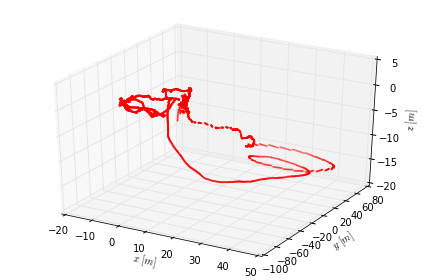

In [10]:
fig = plt.figure().gca(projection='3d')

fig.scatter(translations['x'], translations['y'], translations['z'],s=1,color='red')

fig.set_xlabel('$x$ $[m]$')
fig.set_ylabel('$y$ $[m]$')
fig.set_zlabel('$z$ $[m]$')

plt.tight_layout()
plt.savefig(path + "_trajectory_3d.pdf")

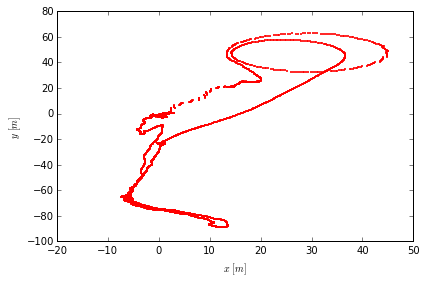

In [11]:
fig = plt.figure().gca()

fig.scatter(translations['x'], translations['y'],s=1,color='red')
fig.set_xlabel('$x$ $[m]$')
fig.set_ylabel('$y$ $[m]$')

plt.tight_layout()
format_axes(plot)

plt.tight_layout()
plt.savefig(path + "_trajectory_2d.pdf")

# Common-Ground

In [12]:
folder_in = "Data/Common-Ground/"
folder_out = "Graphs/"

In [13]:
#filename = "movement_each_scan"
#filename = "movement_2_between"
filename = "movement_10_between"
#filename = "movement_100_between"

In [14]:
path = folder_out + filename
movement = pd.read_csv(folder_in + filename + ".csv", delimiter=";", header=0)

In [15]:
rotations = movement[['phi_1','theta_1','psi_1','phi_2','theta_2','psi_2','d_phi','d_theta','d_psi']]

In [16]:
translations = movement[['x_1','y_1','z_1','x_2','y_2','z_2','d_x','d_y','d_z']]

## Auswahl der Schlüsselszenen

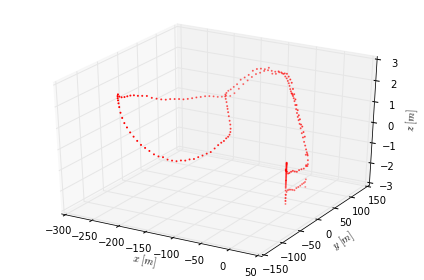

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure().gca(projection='3d')

fig.scatter(translations['x_1'], translations['y_1'], translations['z_1'],s=1,color='red')

fig.set_xlabel('$x$ $[m]$')
fig.set_ylabel('$y$ $[m]$')
fig.set_zlabel('$z$ $[m]$')

plt.tight_layout()
plt.savefig(path + "_trajectory_3d.pdf")

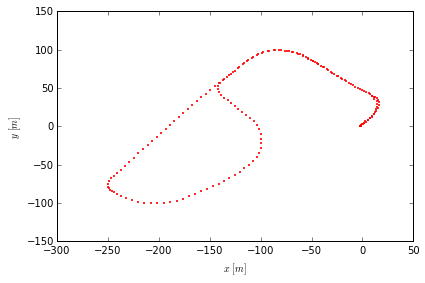

In [18]:
fig = plt.figure().gca()

fig.scatter(translations['x_1'], translations['y_1'],s=1,color='red')
fig.set_xlabel('$x$ $[m]$')
fig.set_ylabel('$y$ $[m]$')

plt.tight_layout()
format_axes(plot)

plt.tight_layout()
plt.savefig(path + "_trajectory_2d.pdf")

In [19]:
from numpy import *

def getExtrema(data, nr_of_each_extrema):
    minima = getMinima(data, nr_of_each_extrema)
    maxima = getMaxima(data, nr_of_each_extrema)
    return minima + maxima

def getMaxima(data, nr_of_extrema):

    c = (diff(sign(diff(data))) < 0).nonzero()[0] + 1 # local max
    maxima = sorted(c, reverse=True)[:nr_of_extrema]
    
    return maxima

def getMinima(data, nr_of_extrema):

    b = (diff(sign(diff(data))) > 0).nonzero()[0] + 1 # local min
    minima = sorted(b)[:nr_of_extrema]
    
    return minima

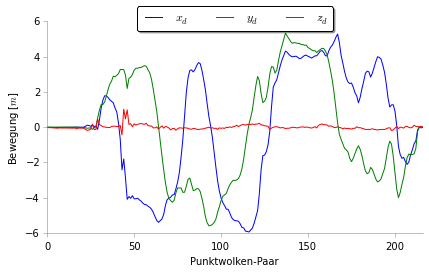

In [20]:
plot = translations[['d_x', 'd_y', 'd_z']].plot()
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Bewegung [$m$]")

plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .9])

plot.legend(['$x_d$','$y_d$','$z_d$'], loc='upper center', bbox_to_anchor=(.5, 1.1), ncol=3, fancybox=True, shadow=True)
plt.savefig(path + "_translations.pdf")

maxima:  (array([  6,   8,  14,  17,  20,  23,  26,  38,  40,  43,  48,  51,  56,
        64,  67,  71,  93,  99, 103, 108, 112, 114, 116, 130, 137, 143,
       149, 154, 158, 167, 175, 184, 190, 202, 215]),)
minima:  (array([  7,  10,  15,  18,  21,  25,  27,  39,  41,  44,  49,  52,  61,
        65,  68,  79,  95, 100, 104, 110, 113, 115, 124, 131, 141, 146,
       152, 155, 166, 173, 179, 186, 197, 214]),)


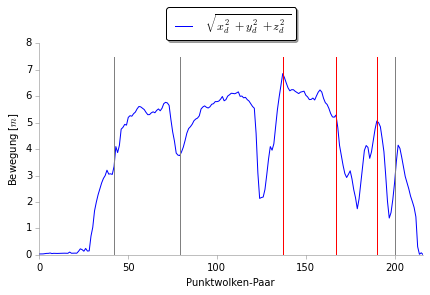

In [21]:
import math

def myfunc():
    for index, row in translations.iterrows():
        d_x = math.pow(row['d_x'], 2)
        d_y = math.pow(row['d_y'], 2)
        d_z = math.pow(row['d_z'], 2)
        yield (math.sqrt(d_x + d_y + d_z))

data = np.fromiter(myfunc(), dtype=float)
    
from scipy.signal import argrelextrema
# for local maxima
print "maxima: ", argrelextrema(data, np.greater)
# for local minima
print "minima: ", argrelextrema(data, np.less)    

df = pd.DataFrame(data, columns=['length'])

plot = df.plot()
plt.plot([42, 42], [0, 7.5], 'gray', lw=1)
plt.plot([79, 79], [0, 7.5], 'gray', lw=1)
plt.plot([137, 137], [0, 7.5], 'red', lw=1)
plt.plot([167, 167], [0, 7.5], 'red', lw=1)
plt.plot([190, 190], [0, 7.5], 'red', lw=1)
plt.plot([200, 200], [0, 7.5], 'gray', lw=1)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Bewegung [$m$]")

plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .9])

plot.legend(['$\sqrt{x_d^2 + y_d^2 + z_d^2}$'], loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=3, fancybox=True, shadow=True)
plt.savefig(path + "_translations_length.pdf")

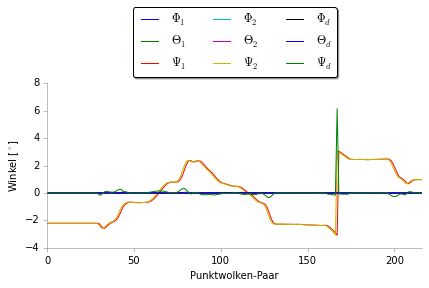

In [22]:
plot = rotations.plot()
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Winkel [$^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$\Phi_1$','$\Theta_1$','$\Psi_1$','$\Phi_2$','$\Theta_2$','$\Psi_2$','$\Phi_d$','$\Theta_d$','$\Psi_d$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(path + "_rotations.pdf")

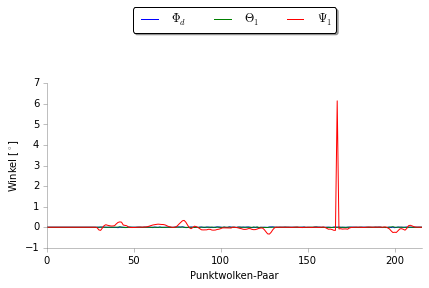

In [23]:
plot = rotations[['d_phi', 'd_theta', 'd_psi']].plot()
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Winkel [$^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$\Phi_d$','$\Theta_1$','$\Psi_1$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(path + "_rotations_delta.pdf")

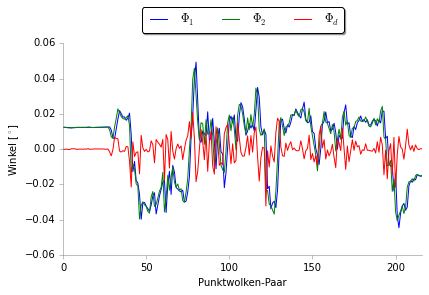

In [24]:
plot = rotations[['phi_1', 'phi_2', 'd_phi']].plot()
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Winkel [$^\circ$]")

plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .9])

plot.legend(['$\Phi_1$','$\Phi_2$','$\Phi_d$'], loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=3, fancybox=True, shadow=True)
plt.savefig(path + "_rotations_phi.pdf")

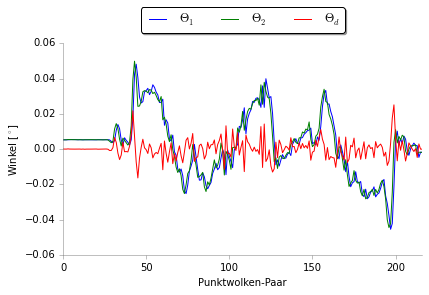

In [25]:
plot = rotations[['theta_1', 'theta_2', 'd_theta']].plot()
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Winkel [$^\circ$]")

plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .9])

plot.legend(['$\Theta_1$','$\Theta_2$','$\Theta_d$'], loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=3, fancybox=True, shadow=True)
plt.savefig(path + "_rotations_theta.pdf")

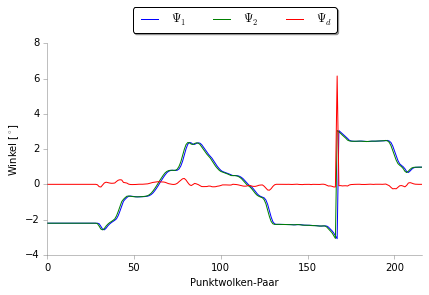

In [26]:
plot = rotations[['psi_1', 'psi_2', 'd_psi']].plot()
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Winkel [$^\circ$]")

plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .9])

plot.legend(['$\Psi_1$','$\Psi_2$','$\Psi_d$'], loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=3, fancybox=True, shadow=True)
plt.savefig(path + "_rotations_psi.pdf")

maxima:  (array([  1,   3,   7,  13,  15,  19,  21,  24,  26,  31,  34,  42,  49,
        53,  64,  79,  83,  85,  90,  96, 105, 114, 119, 128, 134, 137,
       141, 144, 147, 152, 155, 158, 162, 167, 170, 173, 179, 182, 185,
       188, 191, 193, 199, 201, 206, 209]),)
minima:  (array([  2,   5,  11,  14,  18,  20,  22,  25,  27,  32,  37,  48,  52,
        54,  73,  82,  84,  87,  93, 102, 107, 116, 124, 133, 135, 139,
       142, 145, 150, 153, 157, 159, 163, 169, 172, 177, 180, 184, 187,
       189, 192, 194, 200, 204, 207]),)


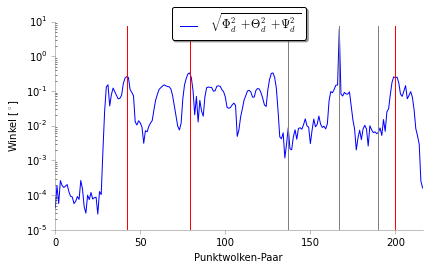

In [27]:
def lengthrot():
    for index, row in rotations.iterrows():
        d_phi = math.pow(row['d_phi'], 2)
        d_theta = math.pow(row['d_theta'], 2)
        d_psi = math.pow(row['d_psi'], 2)
        yield (math.sqrt(d_phi + d_theta + d_psi))

data = np.fromiter(lengthrot(), dtype=float)
    
from scipy.signal import argrelextrema
# for local maxima
print "maxima: ", argrelextrema(data, np.greater)
# for local minima
print "minima: ", argrelextrema(data, np.less)  

df = pd.DataFrame(data, columns=['length'])

plot = df.plot(logy=True)
plt.plot([42, 42], [0, 7.5], 'red', lw=1)
plt.plot([79, 79], [0, 7.5], 'red', lw=1)
plt.plot([137, 137], [0, 7.5], 'gray', lw=1)
plt.plot([167, 167], [0, 7.5], 'gray', lw=1)
plt.plot([190, 190], [0, 7.5], 'gray', lw=1)
plt.plot([200, 200], [0, 7.5], 'red', lw=1)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Winkel [$^\circ$]")

plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .9])

plot.legend(['$\sqrt{\Phi_d^2 + \Theta_d^2 + \Psi_d^2}$'], loc='upper center', bbox_to_anchor=(.5, 1.1), ncol=3, fancybox=True, shadow=True)
plt.savefig(path + "_rotations_length.pdf")

## Analyse der Kalibrierung im Sensor-Bezugssystem

### unter korrekter Vorgabe

In [28]:
voxel_name = "korrekte_vorgabe_sensor_voxel_emp"
covariance_name = "korrekte_vorgabe_sensor_covariance_emp"
both_name = "korrekte_vorgabe_sensor_both_emp"
none_name = "korrekte_vorgabe_sensor_kein_Filter_emp"

covariance_path = folder_out + covariance_name
covariance = pd.read_csv(folder_in + covariance_name + ".csv", delimiter=";", header=0)
covariance[['phi']] = np.rad2deg(covariance[['phi']])
covariance[['theta']] = np.rad2deg(covariance[['theta']])
covariance[['psi']] = np.rad2deg(covariance[['psi']])

both_path = folder_out + both_name
both = pd.read_csv(folder_in + both_name + ".csv", delimiter=";", header=0)
both[['phi']] = np.rad2deg(both[['phi']])
both[['theta']] = np.rad2deg(both[['theta']])
both[['psi']] = np.rad2deg(both[['psi']])

none_path = folder_out + none_name
none = pd.read_csv(folder_in + none_name + ".csv", delimiter=";", header=0)
none[['phi']] = np.rad2deg(none[['phi']])
none[['theta']] = np.rad2deg(none[['theta']])
none[['psi']] = np.rad2deg(none[['psi']])

voxel_path = folder_out + voxel_name
voxel = pd.read_csv(folder_in + voxel_name + ".csv", delimiter=";", header=0)
voxel[['phi']] = np.rad2deg(voxel[['phi']])
voxel[['theta']] = np.rad2deg(voxel[['theta']])
voxel[['psi']] = np.rad2deg(voxel[['psi']])

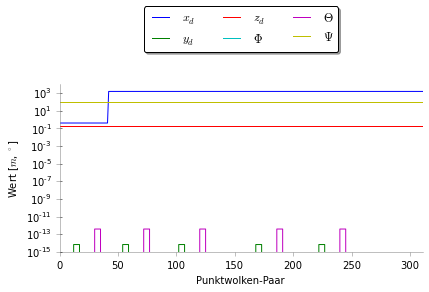

In [29]:
plot = covariance[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(covariance_path + "_variationen.pdf")

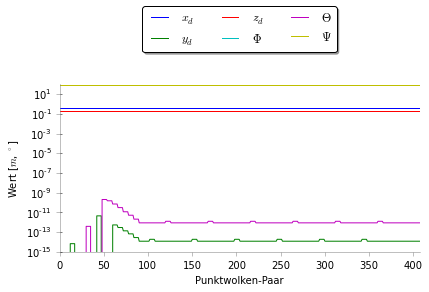

In [30]:
plot = both[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(both_path + "_variationen.pdf")

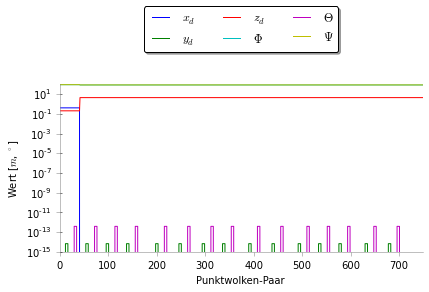

In [31]:
plot = none[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(none_path + "_variationen.pdf")

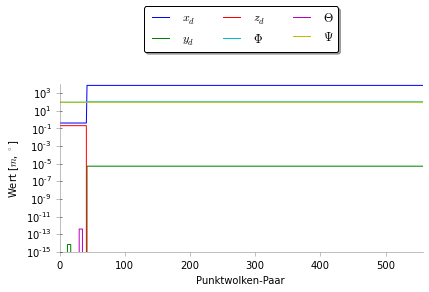

In [32]:
plot = voxel[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(voxel_path + "_variationen.pdf")

In [33]:
nones = pd.Series(none['icp_fitness_score'], name='none')
covariances = pd.Series(covariance['icp_fitness_score'], name='covariance')
voxels = pd.Series(voxel['icp_fitness_score'], name='voxel')
boths = pd.Series(both['icp_fitness_score'], name='both')

df = pd.concat([nones, voxels, covariances, boths], axis=1)

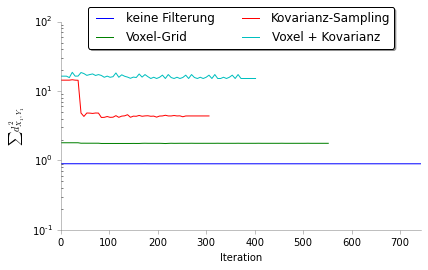

In [34]:
plot = df.iloc[::6, :].plot(logy=True)
plot.set_xlabel("Iteration")
plot.set_ylabel("$\sum {d_{X_1, Y_1}^2}$")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .9])

plot.legend(['keine Filterung','Voxel-Grid','Kovarianz-Sampling','Voxel + Kovarianz'], loc='upper center', bbox_to_anchor=(.5, 1.1), ncol=2, fancybox=True, shadow=True)
plt.savefig(folder_out + "sensor_korrekte_pose_score_szene_6.pdf")

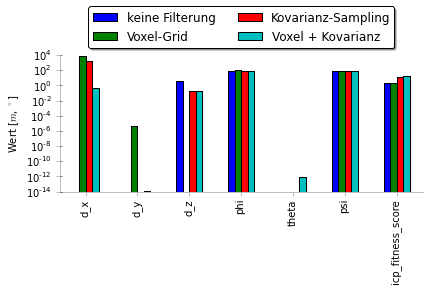

In [35]:
df = none.tail(1).append([voxel.tail(1)]).append([covariance.tail(1)]).append([both.tail(1)]).transpose()

plot = df.plot(kind='bar', logy=True)
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .8])

plot.legend(['keine Filterung','Voxel-Grid','Kovarianz-Sampling','Voxel + Kovarianz'], loc='upper center', bbox_to_anchor=(.5, 1.4), ncol=2, fancybox=True, shadow=True)
plt.savefig(folder_out + "sensor_korrekte_pose_loesungsbereiche.pdf")

### unter falscher Vorgabe

In [36]:
voxel_name = "falsche_vorgabe_sensor_voxel_emp"
covariance_name = "falsche_vorgabe_sensor_covariance_emp"
both_name = "falsche_vorgabe_sensor_both_emp"
none_name = "falsche_vorgabe_sensor_kein_Filter_emp"

covariance_path = folder_out + covariance_name
covariance = pd.read_csv(folder_in + covariance_name + ".csv", delimiter=";", header=0)
covariance[['phi']] = np.rad2deg(covariance[['phi']])
covariance[['theta']] = np.rad2deg(covariance[['theta']])
covariance[['psi']] = np.rad2deg(covariance[['psi']])

both_path = folder_out + both_name
both = pd.read_csv(folder_in + both_name + ".csv", delimiter=";", header=0)
both[['phi']] = np.rad2deg(both[['phi']])
both[['theta']] = np.rad2deg(both[['theta']])
both[['psi']] = np.rad2deg(both[['psi']])

none_path = folder_out + none_name
none = pd.read_csv(folder_in + none_name + ".csv", delimiter=";", header=0)
none[['phi']] = np.rad2deg(none[['phi']])
none[['theta']] = np.rad2deg(none[['theta']])
none[['psi']] = np.rad2deg(none[['psi']])

voxel_path = folder_out + voxel_name
voxel = pd.read_csv(folder_in + voxel_name + ".csv", delimiter=";", header=0)
voxel[['phi']] = np.rad2deg(voxel[['phi']])
voxel[['theta']] = np.rad2deg(voxel[['theta']])
voxel[['psi']] = np.rad2deg(voxel[['psi']])

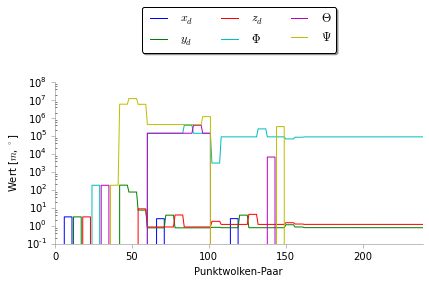

In [37]:
plot = covariance[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(covariance_path + "_variationen.pdf")

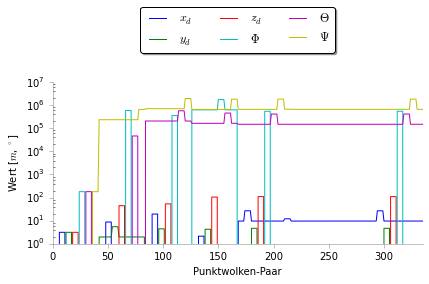

In [38]:
plot = both[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(both_path + "_variationen.pdf")

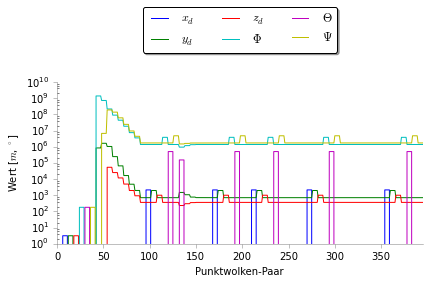

In [39]:
plot = none[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(none_path + "_variationen.pdf")

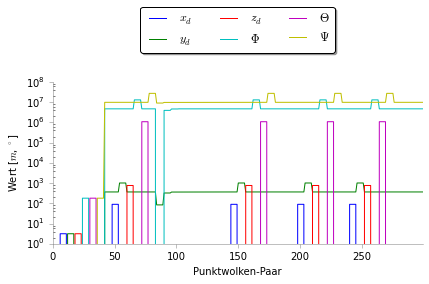

In [40]:
plot = voxel[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(voxel_path + "_variationen.pdf")

In [41]:
nones = pd.Series(none['icp_fitness_score'], name='none')
covariances = pd.Series(covariance['icp_fitness_score'], name='covariance')
voxels = pd.Series(voxel['icp_fitness_score'], name='voxel')
boths = pd.Series(both['icp_fitness_score'], name='both')

df = pd.concat([nones, voxels, covariances, boths], axis=1)

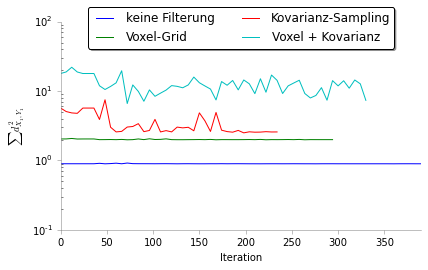

In [42]:
plot = df.iloc[::6, :].plot(logy=True)
plot.set_xlabel("Iteration")
plot.set_ylabel("$\sum {d_{X_1, Y_1}^2}$")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .9])

plot.legend(['keine Filterung','Voxel-Grid','Kovarianz-Sampling','Voxel + Kovarianz'], loc='upper center', bbox_to_anchor=(.5, 1.1), ncol=2, fancybox=True, shadow=True)
plt.savefig(folder_out + "sensor_falsche_pose_score_szene_6.pdf")

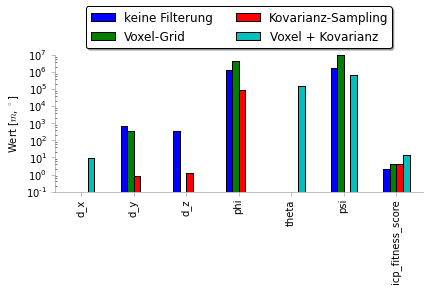

In [43]:
df = none.tail(1).append([voxel.tail(1)]).append([covariance.tail(1)]).append([both.tail(1)]).transpose()

plot = df.plot(kind='bar', logy=True)
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .8])

plot.legend(['keine Filterung','Voxel-Grid','Kovarianz-Sampling','Voxel + Kovarianz'], loc='upper center', bbox_to_anchor=(.5, 1.4), ncol=2, fancybox=True, shadow=True)
plt.savefig(folder_out + "sensor_falsche_pose_loesungsbereiche.pdf")

## Analyse der Kalibrierung im Welt-Bezugssystem

### unter korrekter Vorgabe

In [44]:
voxel_name = "korrekte_vorgabe_welt_voxel_emp"
covariance_name = "korrekte_vorgabe_welt_covariance_emp"
both_name = "korrekte_vorgabe_welt_both_emp"
none_name = "korrekte_vorgabe_welt_kein_Filter_emp"

covariance_path = folder_out + covariance_name
covariance = pd.read_csv(folder_in + covariance_name + ".csv", delimiter=";", header=0)
covariance[['phi']] = np.rad2deg(covariance[['phi']])
covariance[['theta']] = np.rad2deg(covariance[['theta']])
covariance[['psi']] = np.rad2deg(covariance[['psi']])

both_path = folder_out + both_name
both = pd.read_csv(folder_in + both_name + ".csv", delimiter=";", header=0)
both[['phi']] = np.rad2deg(both[['phi']])
both[['theta']] = np.rad2deg(both[['theta']])
both[['psi']] = np.rad2deg(both[['psi']])

none_path = folder_out + none_name
none = pd.read_csv(folder_in + none_name + ".csv", delimiter=";", header=0)
none[['phi']] = np.rad2deg(none[['phi']])
none[['theta']] = np.rad2deg(none[['theta']])
none[['psi']] = np.rad2deg(none[['psi']])

voxel_path = folder_out + voxel_name
voxel = pd.read_csv(folder_in + voxel_name + ".csv", delimiter=";", header=0)
voxel[['phi']] = np.rad2deg(voxel[['phi']])
voxel[['theta']] = np.rad2deg(voxel[['theta']])
voxel[['psi']] = np.rad2deg(voxel[['psi']])

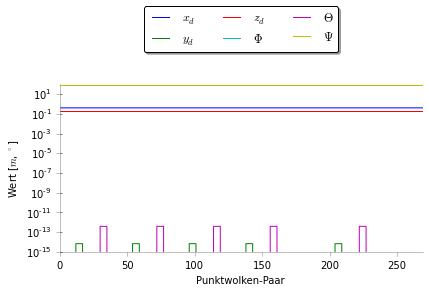

In [45]:
plot = covariance[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(covariance_path + "_variationen.pdf")

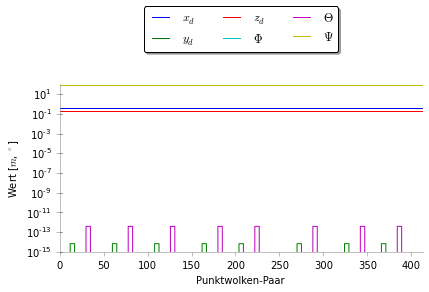

In [46]:
plot = both[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(both_path + "_variationen.pdf")

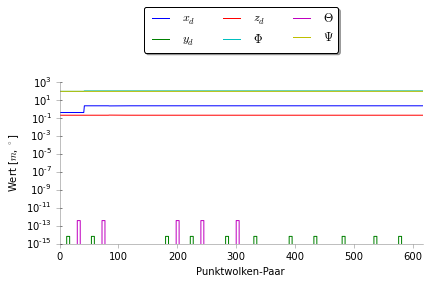

In [47]:
plot = none[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(none_path + "_variationen.pdf")

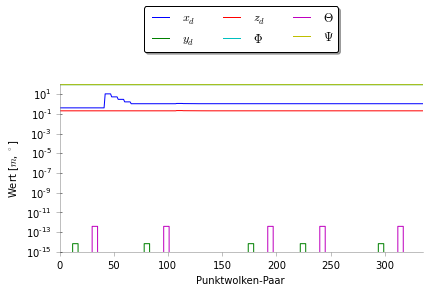

In [48]:
plot = voxel[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(voxel_path + "_variationen.pdf")

In [49]:
nones = pd.Series(none['icp_fitness_score'], name='none')
covariances = pd.Series(covariance['icp_fitness_score'], name='covariance')
voxels = pd.Series(voxel['icp_fitness_score'], name='voxel')
boths = pd.Series(both['icp_fitness_score'], name='both')

df = pd.concat([nones, voxels, covariances, boths], axis=1)

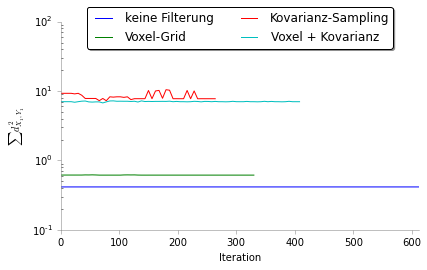

In [50]:
plot = df.iloc[::6, :].plot(logy=True)
plot.set_xlabel("Iteration")
plot.set_ylabel("$\sum {d_{X_1, Y_1}^2}$")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .9])

plot.legend(['keine Filterung','Voxel-Grid','Kovarianz-Sampling','Voxel + Kovarianz'], loc='upper center', bbox_to_anchor=(.5, 1.1), ncol=2, fancybox=True, shadow=True)
plt.savefig(folder_out + "welt_korrekte_pose_score_szene_6.pdf")

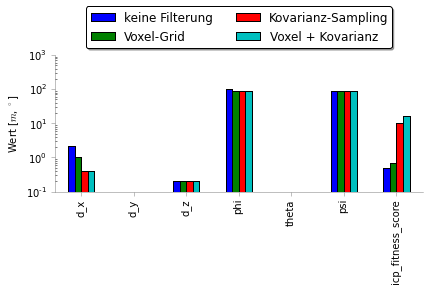

In [51]:
df = none.tail(1).append([voxel.tail(1)]).append([covariance.tail(1)]).append([both.tail(1)]).transpose()

plot = df.plot(kind='bar', logy=True)
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .8])

plot.legend(['keine Filterung','Voxel-Grid','Kovarianz-Sampling','Voxel + Kovarianz'], loc='upper center', bbox_to_anchor=(.5, 1.4), ncol=2, fancybox=True, shadow=True)
plt.savefig(folder_out + "welt_korrekte_pose_loesungsbereiche.pdf")

### unter falscher Vorgabe

In [52]:
voxel_name = "falsche_vorgabe_welt_voxel_emp"
covariance_name = "falsche_vorgabe_welt_covariance_emp"
both_name = "falsche_vorgabe_welt_both_emp"
none_name = "falsche_vorgabe_welt_kein_Filter_emp"

covariance_path = folder_out + covariance_name
covariance = pd.read_csv(folder_in + covariance_name + ".csv", delimiter=";", header=0)
covariance[['phi']] = np.rad2deg(covariance[['phi']])
covariance[['theta']] = np.rad2deg(covariance[['theta']])
covariance[['psi']] = np.rad2deg(covariance[['psi']])

both_path = folder_out + both_name
both = pd.read_csv(folder_in + both_name + ".csv", delimiter=";", header=0)
both[['phi']] = np.rad2deg(both[['phi']])
both[['theta']] = np.rad2deg(both[['theta']])
both[['psi']] = np.rad2deg(both[['psi']])

none_path = folder_out + none_name
none = pd.read_csv(folder_in + none_name + ".csv", delimiter=";", header=0)
none[['phi']] = np.rad2deg(none[['phi']])
none[['theta']] = np.rad2deg(none[['theta']])
none[['psi']] = np.rad2deg(none[['psi']])

voxel_path = folder_out + voxel_name
voxel = pd.read_csv(folder_in + voxel_name + ".csv", delimiter=";", header=0)
voxel[['phi']] = np.rad2deg(voxel[['phi']])
voxel[['theta']] = np.rad2deg(voxel[['theta']])
voxel[['psi']] = np.rad2deg(voxel[['psi']])

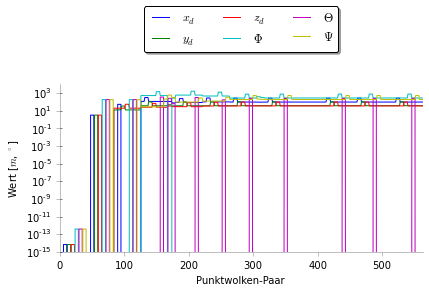

In [53]:
plot = covariance[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(covariance_path + "_variationen.pdf")

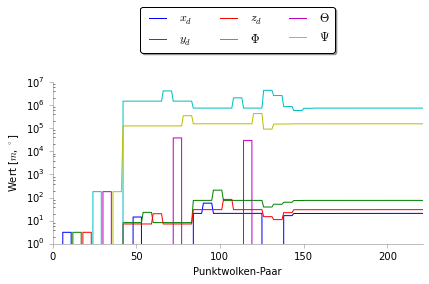

In [54]:
plot = both[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(both_path + "_variationen.pdf")

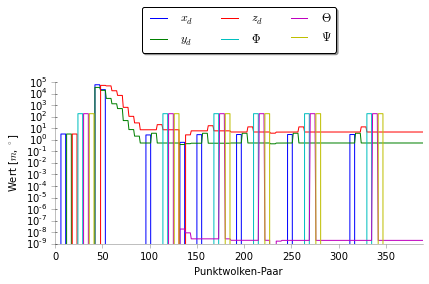

In [55]:
plot = none[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(none_path + "_variationen.pdf")

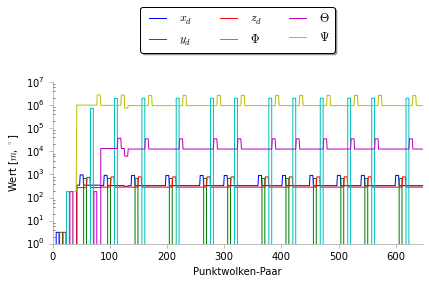

In [56]:
plot = voxel[['d_x', 'd_y', 'd_z','phi', 'theta', 'psi']].plot(logy=True)
plot.set_xlabel("Punktwolken-Paar")
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .7])

plot.legend(['$x_d$','$y_d$','$z_d$','$\Phi$','$\Theta$','$\Psi$'], loc='upper center', bbox_to_anchor=(.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.savefig(voxel_path + "_variationen.pdf")

In [57]:
nones = pd.Series(none['icp_fitness_score'], name='none')
covariances = pd.Series(covariance['icp_fitness_score'], name='covariance')
voxels = pd.Series(voxel['icp_fitness_score'], name='voxel')
boths = pd.Series(both['icp_fitness_score'], name='both')

df = pd.concat([nones, voxels, covariances, boths], axis=1)

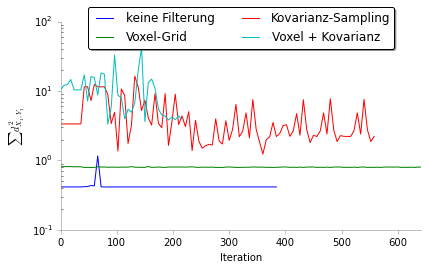

In [58]:
plot = df.iloc[::6, :].plot(logy=True)
plot.set_xlabel("Iteration")
plot.set_ylabel("$\sum {d_{X_1, Y_1}^2}$")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .9])

plot.legend(['keine Filterung','Voxel-Grid','Kovarianz-Sampling','Voxel + Kovarianz'], loc='upper center', bbox_to_anchor=(.5, 1.1), ncol=2, fancybox=True, shadow=True)
plt.savefig(folder_out + "welt_falsche_pose_score_szene_6.pdf")

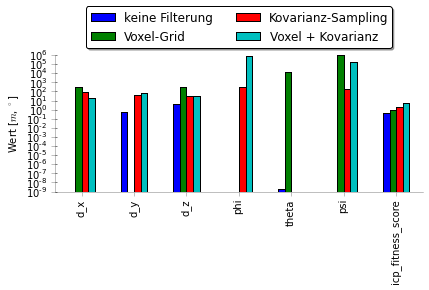

In [59]:
df = none.tail(1).append([voxel.tail(1)]).append([covariance.tail(1)]).append([both.tail(1)]).transpose()

plot = df.plot(kind='bar', logy=True)
plot.set_ylabel("Wert [$m$, $^\circ$]")
plot.set_title("")
plt.tight_layout()
format_axes(plot)

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * .8])

plot.legend(['keine Filterung','Voxel-Grid','Kovarianz-Sampling','Voxel + Kovarianz'], loc='upper center', bbox_to_anchor=(.5, 1.4), ncol=2, fancybox=True, shadow=True)
plt.savefig(folder_out + "welt_falsche_pose_loesungsbereiche.pdf")